# Лабораторная работа 4

# Правильный многоугольник Рело. Векторизация вычислений в *numpy*

Зарихта Матвей Дмитриевич, 12 мая 2025

## Задание 4.1. Построение треугольника Рело


### Этап 1. Вычисление координат вершин правильного треугольника


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 3 # количество вершин треугольника Рело
center = np.array([0,0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания одной стороны треугольника Рело

In [4]:
l = r
R = l/(2*np.sin(np.pi/n))

In [8]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
vertices


array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

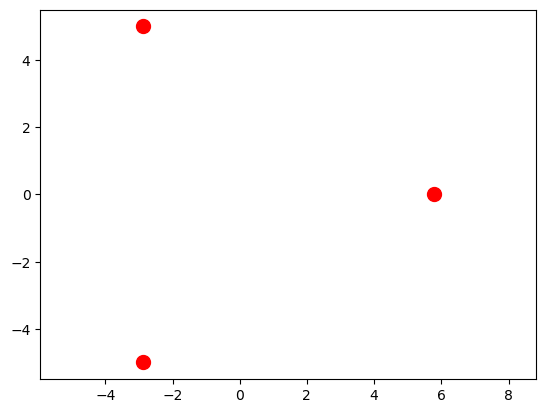

In [10]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal');

### Этап 2. Представление одной стороны треугольника Рело


In [13]:
alpha = 2*np.pi/n
beta = alpha/2

In [15]:
angle = np.linspace(-beta/2, beta/2, N)
angle

array([-0.52359878, -0.51302102, -0.50244327, -0.49186552, -0.48128776,
       -0.47071001, -0.46013226, -0.4495545 , -0.43897675, -0.428399  ,
       -0.41782125, -0.40724349, -0.39666574, -0.38608799, -0.37551023,
       -0.36493248, -0.35435473, -0.34377697, -0.33319922, -0.32262147,
       -0.31204371, -0.30146596, -0.29088821, -0.28031046, -0.2697327 ,
       -0.25915495, -0.2485772 , -0.23799944, -0.22742169, -0.21684394,
       -0.20626618, -0.19568843, -0.18511068, -0.17453293, -0.16395517,
       -0.15337742, -0.14279967, -0.13222191, -0.12164416, -0.11106641,
       -0.10048865, -0.0899109 , -0.07933315, -0.06875539, -0.05817764,
       -0.04759989, -0.03702214, -0.02644438, -0.01586663, -0.00528888,
        0.00528888,  0.01586663,  0.02644438,  0.03702214,  0.04759989,
        0.05817764,  0.06875539,  0.07933315,  0.0899109 ,  0.10048865,
        0.11106641,  0.12164416,  0.13222191,  0.14279967,  0.15337742,
        0.16395517,  0.17453293,  0.18511068,  0.19568843,  0.20

In [17]:
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi),
 np.sin(angle + np.pi)])

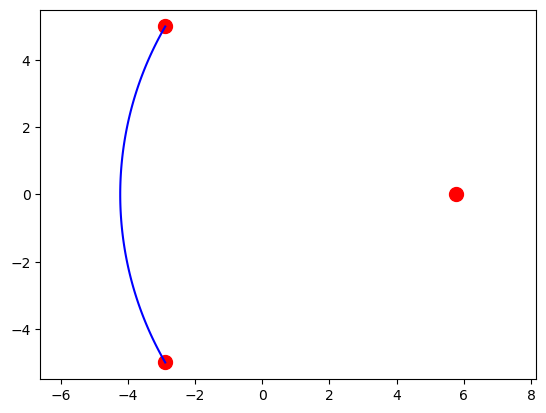

In [19]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');

In [21]:
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha),
 np.sin(angle + np.pi + alpha)])

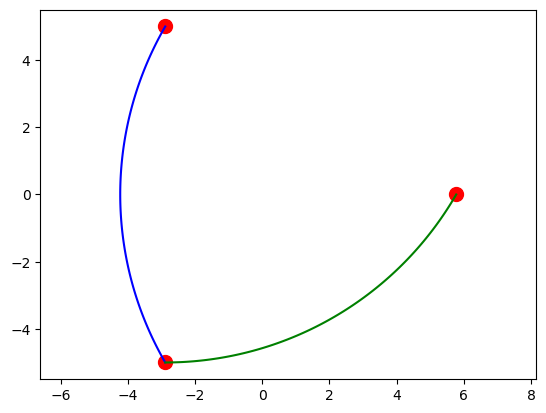

In [23]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');

### Этап 3. Моделирование границы треугольника Рело

In [26]:
list_sides = [vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for  i in range(n)]

In [28]:
sides = np.concatenate(list_sides)

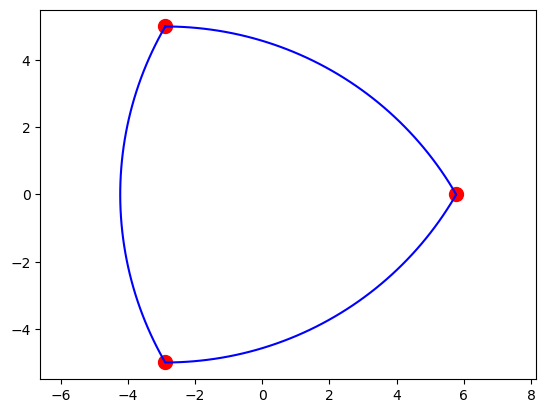

In [30]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)
plt.axis('equal');

## Задание 4.2. Построение правильного многоугольника Рело

In [33]:
n = 5

In [35]:
R = r / (2 * np.cos(np.pi / (2 * n)))

In [37]:
# l = 2 * R * np.sin(np.pi / n)
l = r * np.sin(np.pi / n) / np.cos(np.pi / (2 * n))

In [39]:
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])

In [41]:
alpha = 2 * np.pi / n
beta = alpha * (n // 2) 

In [43]:
angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
vertices = center + r * np.column_stack([np.cos(angles), np.sin(angles)])
angle1 = np.linspace(np.pi - beta/2, np.pi + beta/2, N)
sideX = vertices[0] + r * np.column_stack([np.cos(angle1), np.sin(angle1)])

r - диаметр описанной окружности, умноженный на косинус(пи / 2n)
r= D * cos(П/2n)
длина стороны n-угольника Рело связана с D:
l = D * sin(pi / n)
выразим D и подставим во вторую формулу. получим:
l = r * np.sin(np.pi / n) / np.cos(np.pi / (2 * n))

## Задание 4.3. Результирующая пользовательская функция


In [47]:

'''def regular_polygon_Relo(n=3, center=None, r=1, N=100):
    assert isinstance(n, int) and n > 2 and n % 2 == 1, "n должно быть нечетным и больше 2"
    assert r > 0, "r должно быть больше нуля"
    assert isinstance(N, int) and N >= 1, "N должно быть целым и больше единицы"
    if center is None:
        center = np.array([0.0, 0.0])
    R_circum = r / (2 * np.sin(np.pi / n))

    angles_vertices = np.linspace(0, 2 * np.pi, n, endpoint=False)
    vertices = center + R_circum * np.column_stack([np.cos(angles_vertices), np.sin(angles_vertices)])

    points = []
    for i in range(n):
        arc_center = vertices[i]
        start_point_idx = (i + (n + 1) // 2) % n
        end_point_idx = (i + (n - 1) // 2) % n
        
        start_point = vertices[start_point_idx]
        end_point = vertices[end_point_idx]

        theta_start = np.arctan2(start_point[1] - arc_center[1], start_point[0] - arc_center[0])
        theta_end = np.arctan2(end_point[1] - arc_center[1], end_point[0] - arc_center[0])

        if theta_end < theta_start:
            theta_end += 2 * np.pi

        theta_arc = np.linspace(theta_start, theta_end, N)
        
        x_arc = arc_center[0] + r * np.cos(theta_arc)
        y_arc = arc_center[1] + r * np.sin(theta_arc)
        points.append(np.column_stack([x_arc, y_arc]))
    
    return np.vstack(points)'''

'def regular_polygon_Relo(n=3, center=None, r=1, N=100):\n    assert isinstance(n, int) and n > 2 and n % 2 == 1, "n должно быть нечетным и больше 2"\n    assert r > 0, "r должно быть больше нуля"\n    assert isinstance(N, int) and N >= 1, "N должно быть целым и больше единицы"\n    if center is None:\n        center = np.array([0.0, 0.0])\n    R_circum = r / (2 * np.sin(np.pi / n))\n\n    angles_vertices = np.linspace(0, 2 * np.pi, n, endpoint=False)\n    vertices = center + R_circum * np.column_stack([np.cos(angles_vertices), np.sin(angles_vertices)])\n\n    points = []\n    for i in range(n):\n        arc_center = vertices[i]\n        start_point_idx = (i + (n + 1) // 2) % n\n        end_point_idx = (i + (n - 1) // 2) % n\n        \n        start_point = vertices[start_point_idx]\n        end_point = vertices[end_point_idx]\n\n        theta_start = np.arctan2(start_point[1] - arc_center[1], start_point[0] - arc_center[0])\n        theta_end = np.arctan2(end_point[1] - arc_center[1],

## Задание 4.4. Тестирование функции

In [50]:
import sys
sys.path.append(r"C:\Users\user\123")

In [52]:
import numpy as np
from relo import regular_polygon_Relo

In [54]:
points = regular_polygon_Relo(n=3, r=2)


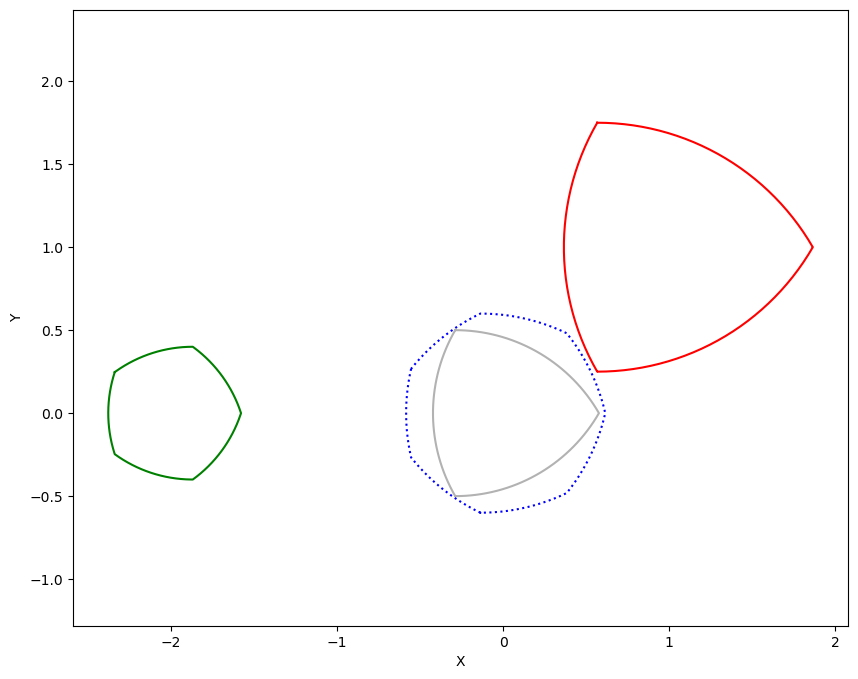

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

points1 = regular_polygon_Relo(3, np.array([1.0, 1.0]), 1.5, 30)
plt.plot(points1[:, 0], points1[:, 1], 'r-',)

points2 = regular_polygon_Relo(n=5, center=np.array([-2.0, 0.0]), r=0.8, N=50)
plt.plot(points2[:, 0], points2[:, 1], 'g',)

points3 = regular_polygon_Relo(7, r=1.2, N=40)
plt.plot(points3[:, 0], points3[:, 1], 'b:',)

points4 = regular_polygon_Relo()
plt.plot(points4[:, 0], points4[:, 1], 'k-', alpha=0.3)

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()